<a href="https://colab.research.google.com/github/pheb2014939/App_VT/blob/main/allsvm_under_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#  svm all records

from google.colab import drive
import pandas as pd
drive.mount("/content/drive")
path = '/content/drive/MyDrive/1lvtn/Android_RansomewareDataset1.csv'
df=pd.read_csv(path)
num_records = len(df)
print(f"Number of records: {num_records}")
print(df.sample(5))

Mounted at /content/drive
Number of records: 392034
        Unnamed: 0  Flow ID  Source IP  Source Port  Destination IP  \
216954          79   170465         14        48032            1761   
136195        4731    99695         14        59996            2807   
155099        2230    87149         14        57850             156   
31756           80   117483         14        43760            5027   
72711         1570   177815         14        52632            2002   

        Destination Port  Protocol  Flow Duration  Total Fwd Packets  \
216954               443         6       12294141                 80   
136195               443         6          64306                  2   
155099               443         6       17728596                  6   
31756                443         6       91072797                 10   
72711                 80         6         231427                  1   

        Total Backward Packets  ...  min_seg_size_forward  Active Mean  \
216954        

<class 'pandas.core.frame.DataFrame'>
Index: 392034 entries, 0 to 2931
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      392034 non-null  int64  
 1   Source IP                    392034 non-null  int64  
 2   Source Port                  392034 non-null  int64  
 3   Destination IP               392034 non-null  int64  
 4   Destination Port             392034 non-null  int64  
 5   Protocol                     392034 non-null  int64  
 6   Flow Duration                392034 non-null  int64  
 7   Total Fwd Packets            392034 non-null  int64  
 8   Total Backward Packets       392034 non-null  int64  
 9   Total Length of Fwd Packets  392034 non-null  int64  
 10  Total Length of Bwd Packets  392034 non-null  int64  
 11  Fwd Packet Length Max        392034 non-null  int64  
 12  Fwd Packet Length Min        392034 non-null  int64  
 13  Fwd Pa

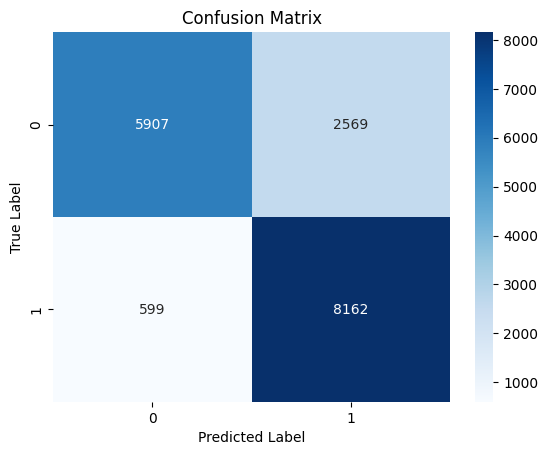

In [2]:
#=========================================================================
!pip install -U imbalanced-learn

import pandas as pd
import matplotlib.pyplot as plt
from imblearn.under_sampling import NearMiss
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

# Load the dataset
path = '/content/drive/MyDrive/1lvtn/Android_RansomewareDataset1.csv'
df = pd.read_csv(path, index_col=0)

# Kiểm tra dữ liệu đầu vào
print(df.info())  # Kiểm tra thông tin dữ liệu

# Prepare the data
X = df.drop('Label', axis=1)
y = df['Label']

# Apply NearMiss for under-sampling the majority class
nm = NearMiss(version=1)  # You can try version 1, 2, or 3
X_res, y_res = nm.fit_resample(X, y)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)

# Split the data into training and testing sets using the resampled dataset
X_train, X_test, y_train, y_test = train_test_split(X_res_scaled, y_res, test_size=0.2, random_state=0)

# Initialize and train the SVM model
svm_model = SVC(random_state=1, C=10, kernel="rbf", gamma="scale")
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
#==============================================================

<class 'pandas.core.frame.DataFrame'>
Index: 392034 entries, 0 to 392033
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Flow ID                  392034 non-null  int64  
 1   Source IP                392034 non-null  int64  
 2   Source Port              392034 non-null  int64  
 3   Destination IP           392034 non-null  int64  
 4   Destination Port         392034 non-null  int64  
 5   Protocol                 392034 non-null  int64  
 6   Flow Duration            392034 non-null  int64  
 7   Fwd Packet Length Max    392034 non-null  int64  
 8   Fwd Packet Length Min    392034 non-null  int64  
 9   Bwd Packet Length Min    392034 non-null  int64  
 10  Init_Win_bytes_forward   392034 non-null  int64  
 11  Init_Win_bytes_backward  392034 non-null  int64  
 12  act_data_pkt_fwd         392034 non-null  int64  
 13  min_seg_size_forward     392034 non-null  int64  
 14  Active Me

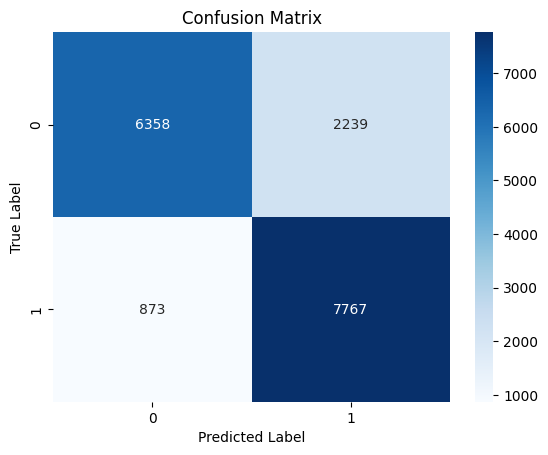

In [ ]:
#nike near miss mà có tham số và 19 cột mà được 0.82

import pandas as pd
import matplotlib.pyplot as plt
from imblearn.under_sampling import NearMiss
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

# Load the dataset
path = '/content/drive/MyDrive/1lvtn/Android_RansomewareDataset19.csv'
df = pd.read_csv(path, index_col=0)

# Kiểm tra dữ liệu đầu vào
print(df.info())  # Kiểm tra thông tin dữ liệu

# Prepare the data
X = df.drop('Label', axis=1)
y = df['Label']

# Apply NearMiss for under-sampling the majority class
nm = NearMiss(version=1)  # You can try version 1, 2, or 3
X_res, y_res = nm.fit_resample(X, y)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)

# Split the data into training and testing sets using the resampled dataset
X_train, X_test, y_train, y_test = train_test_split(X_res_scaled, y_res, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1', verbose=1)

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters from the GridSearch
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
